In [1]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
# pd.set_option('display.max_rows', 500)

In [2]:
sns.set(style='darkgrid')

In [3]:
data_path='D:/EDS/ads_covid_19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_raw=pd.read_csv(data_path)

In [4]:
df_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658100,658100,658100,658100,658100,658503,658503,658503,658503,658503
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11822,11822,11823,11823,11823,11823,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,323654,323654,324025,324025,324288,324344,324558,324558,324922,325110


In [5]:
df_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [6]:
time_idx=df_raw.columns[4:]
df_plot=pd.DataFrame({
    'date':time_idx
})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
df_raw['Country/Region']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
280      West Bank and Gaza
281    Winter Olympics 2022
282                   Yemen
283                  Zambia
284                Zimbabwe
Name: Country/Region, Length: 285, dtype: object

In [8]:
df_raw[df_raw['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
257,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,85942237,86058228,86216418,86230982,86246101,86297081,86452232,86636306,86757621,86909716


In [9]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South'
              ]

In [10]:
for each in country_list:
    df_plot[each]=np.array(df_raw[df_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

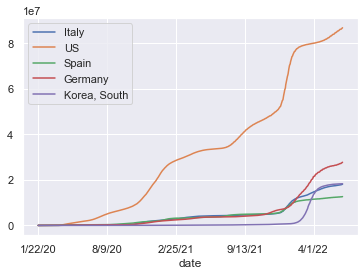

In [11]:
df_plot.set_index('date').plot()

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [13]:
time_idx=[datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%M-%D') for each in time_idx]

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [16]:
df_plot.to_csv('D:/EDS/ads_covid_19/data/processed/COVID_small_flat_table.csv', sep=';')

In [17]:
df_analyse=pd.read_csv('D:/EDS/ads_covid_19/data/processed/COVID_small_flat_table.csv', sep=';',
                        parse_dates=[0])
df_analyse.sort_values('date', ascending=True).tail()

,Unnamed: 0,date,Italy,US,Spain,Germany,"Korea, South"
880,880,2022-06-20,17896065,86297081,12563399,27334993,18289373
881,881,2022-06-21,17959329,86452232,12613634,27454225,18298341
882,882,2022-06-22,18014202,86636306,12613634,27573585,18305783
883,883,2022-06-23,18071634,86757621,12613634,27681775,18312993
884,884,2022-06-24,18128044,86909716,12681820,27771111,18319773


In [18]:
def quick_plot(x_in, df_input, y_scale='log', slider=False):
    """Quick basic plot for static evaluation of time series

    you can push selective columns of your data frame by .iloc[:, [0,6,7,8]]

    Parameters:
    ---------------
    x_in: array
        array representing the date time objects or numbers in the form of dates
    df_input: data frame input
        the plotting matrix where each column is plotted 
        the name of the column to use as a legend in the graphs
    scale: str
        y-axis scale as log or linear
    slider: bool
        True or False for x-axis slider

    Returns:
    ------------------
    """

    fig=go.Figure()
    for each in df_input.columns:
        fig.add_trace(go.Scatter(x=x_in,
                                 y=df_input[each],
                                 name=each,
                                 opacity=0.8))

    fig.update_layout(autosize=True,
                      width=1024,
                      height=768,
                      font=dict(family='PT Sans, monospace',
                      size=18,
                      color="#7f7f7f"
                      )
        )

    fig.update_yaxes(type="log")
    fig.update_xaxes(tickangle=-45,
                     nticks=20,
                     tickfont=dict(size=14, color="#7f7f7f")
                     )

    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [19]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,2:],
           y_scale='log',
           slider=True)

In [20]:
df_analyse.columns[1:]

Index(['date', 'Italy', 'US', 'Spain', 'Germany', 'Korea, South'], dtype='object')

In [21]:
threshold=10000
compare_list=[]
for pos, country in enumerate(df_analyse.columns[2:]):
    compare_list.append(np.array(df_analyse[country][df_analyse[country]>threshold]))

In [22]:
compare_list

[array([   10149,    12462,    15113,    17660,    21157,    24747,
           27980,    31506,    35713,    41035,    47021,    53578,
           59138,    63927,    69176,    74386,    80589,    86498,
           92472,    97689,   101739,   105792,   110574,   115242,
          119827,   124632,   128948,   132547,   135586,   139422,
          143626,   147577,   152271,   156363,   159516,   162488,
          165155,   168941,   172434,   175925,   178972,   181228,
          183957,   187327,   189973,   192994,   195351,   197675,
          199414,   201505,   203591,   205463,   207428,   209328,
          210717,   211938,   213013,   214457,   215858,   217185,
          218268,   219070,   219814,   221216,   222104,   223096,
          223885,   224760,   225435,   225886,   226699,   227364,
          228006,   228658,   229327,   229858,   230158,   230555,
          231139,   231732,   232248,   232664,   232997,   233197,
          233515,   233836,   234013,   234531, 

In [23]:
pd.DataFrame(compare_list, index=df_analyse.columns[2:]).T

,Italy,US,Spain,Germany,"Korea, South"
0,10149.0,13663.0,11748.0,10999.0,10062.0
1,12462.0,20030.0,13910.0,13957.0,10156.0
2,15113.0,26025.0,17963.0,16662.0,10237.0
3,17660.0,34944.0,20410.0,18610.0,10284.0
4,21157.0,46096.0,25374.0,22672.0,10331.0
...,...,...,...,...,...
832,17896065.0,NaN,NaN,NaN,NaN
833,17959329.0,NaN,NaN,NaN,NaN
834,18014202.0,NaN,NaN,NaN,NaN
835,18071634.0,NaN,NaN,NaN,NaN


In [24]:
# reading raw data frame
data_path='D:/EDS/ads_covid_19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_df=pd.read_csv(data_path)
raw_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [25]:
raw_df_base=raw_df.rename(columns={'Country/Region': 'country',
                                   'Province/State': 'state'})

In [26]:
raw_df_base=raw_df_base.drop(['Lat', 'Long'], axis=1)
raw_df_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [27]:
test_df=raw_df_base.set_index(['state', 'country']).T

In [28]:
test_df.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [29]:
test_df.stack(level=[0, 1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
252220,6/24/22,Western Australia,Australia,880899.0
252221,6/24/22,Xinjiang,China,1008.0
252222,6/24/22,Yukon,Canada,4453.0
252223,6/24/22,Yunnan,China,2169.0


In [30]:
# Explorative Data Set
df_plot=pd.read_csv('D:\\EDS\\ads_covid_19\\data\\processed\\COVID_small_flat_table.csv', sep=';')
df_plot.drop('Unnamed: 0', axis=1, inplace=True)
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [31]:
# set figure size with the aid of matplotlib librarary
mpl.rcParams['figure.figsize']=(18, 9)

(10000.0, 100000000.0)

<Figure size 1296x648 with 0 Axes>

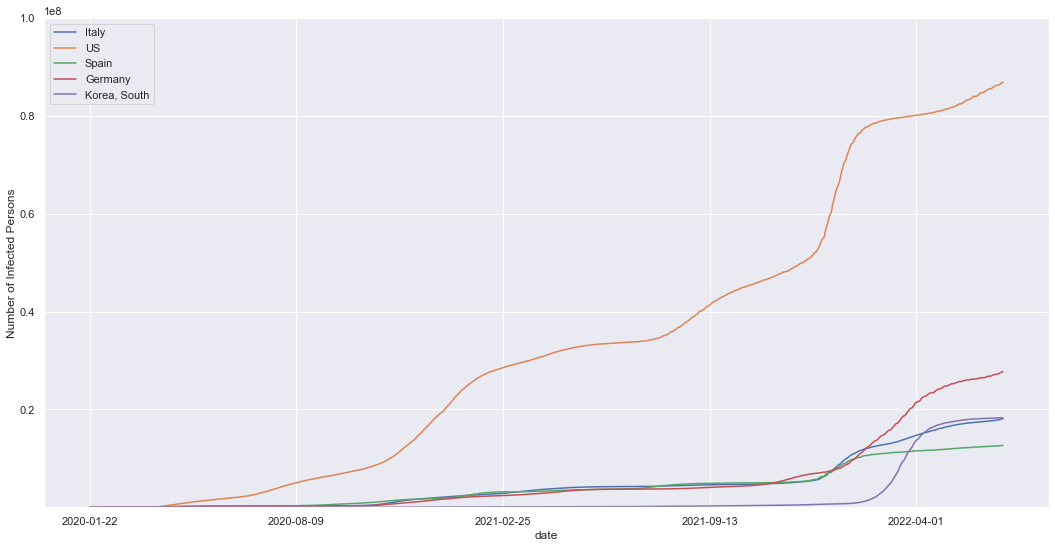

In [32]:
# plot figure with date as the index/reference
plt.figure()
df_plot.set_index('date').plot()
plt.ylabel("Number of Infected Persons", labelpad=2)
plt.ylim(10000, 100000000)

<Figure size 1296x648 with 0 Axes>

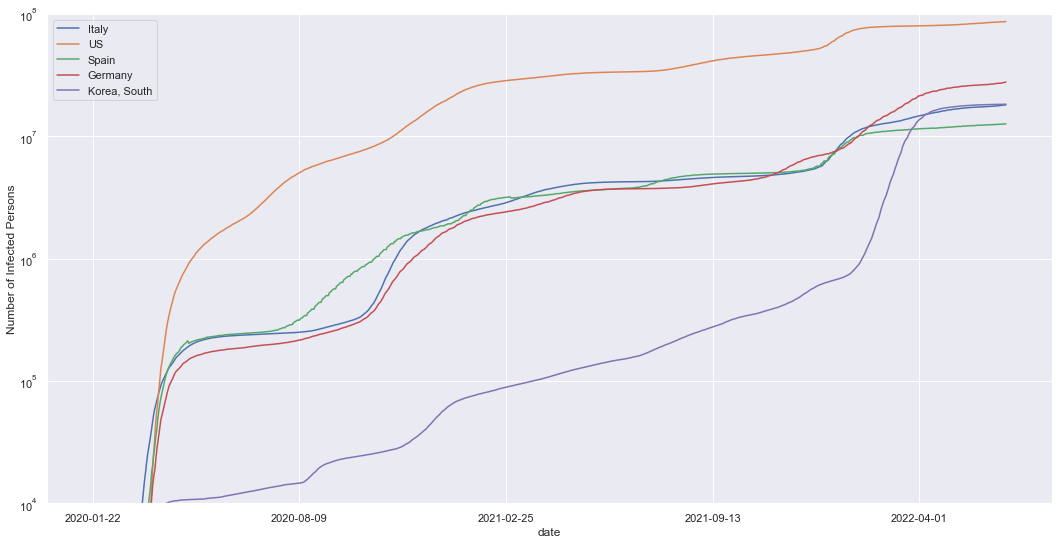

In [35]:
# Exponential form of graph
plt.figure()
ax=df_plot.set_index('date').plot()
plt.ylabel("Number of Infected Persons", labelpad=2)
plt.ylim(10000, 100000000)
ax.set_yscale('log')

<Figure size 1296x648 with 0 Axes>

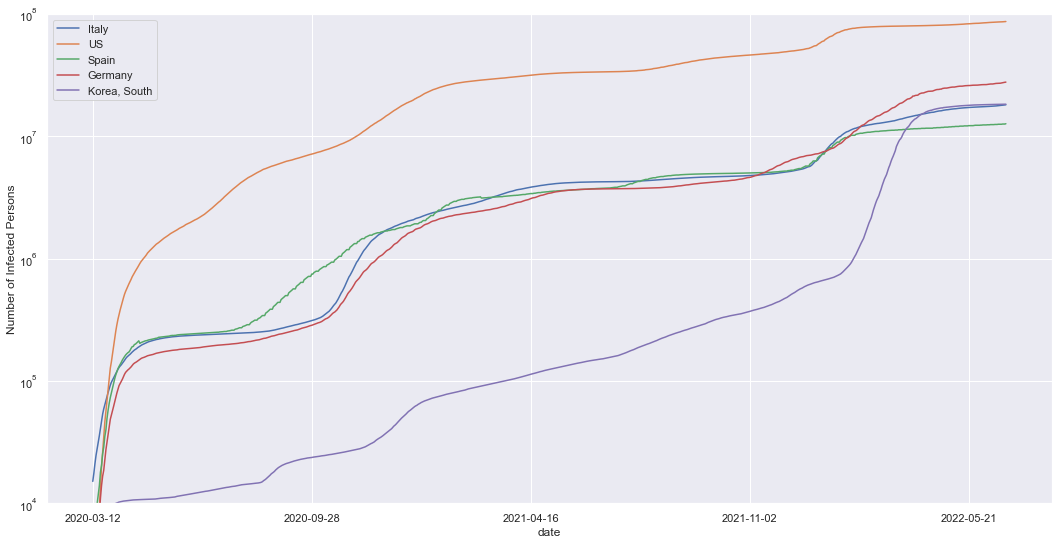

In [36]:
# Exponential form of graph cutting excess part of the plot
plt.figure()
ax=df_plot.iloc[50:, :].set_index('date').plot()
plt.ylabel("Number of Infected Persons", labelpad=2)
plt.ylim(10000, 100000000)
ax.set_yscale('log')

Plot.ly

In [39]:
import plotly.graph_objects as go
import plotly
plotly.__version__

'5.9.0'

In [63]:
fig=go.Figure()

# plotting an individual trace
fig.add_trace(go.Scatter(x=df_plot.date,
              y=df_plot['US'],
              mode='lines'))

# define the properties of the graph/figure
fig.update_layout(
    width=1200,
    height=600,
    xaxis_title="Time",
    yaxis_title="Confirmed Infected Cases (source: John Hopkins CSSE, log-scale)"
)

fig.update_yaxes(type='log', range=[6,8])
